# Introduction to Visualisation Charts

In [1]:
import pandas as pd
import numpy as np
import random

import json
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#import plotly.io as pio
#pio.renderers.default='notebook'

np.random.seed(42)
random.seed(42)

In [2]:
# Import company colors
with open('plot_colors.json', 'r') as pc:
    color_dict = json.load(pc)

c_light, c_dark, c_blue, c_green = color_dict['color_light'], color_dict['color_dark'], color_dict['color_blue'], color_dict['color_green']

c_blue = '#33A5FF'
c_green = '#A7E521'
c_yellow = '#FFE600'
c_purple = '#696CFF'
c_grey = '#9e9e9e'

sns.set_palette([c_light, c_dark, c_blue, c_green, c_yellow])

custom_palette = [c_light, c_dark, c_blue, c_green, c_yellow]

custom_colorscale = [
    [0.0, c_light],
    [0.5, '#f2f0ec'],  # light
    [1.0, c_blue]
]

In [3]:
def length_vs_area(barplots=True, figure_size=(19,9)):

    data = pd.DataFrame({
        'x': np.arange(1, 6),
        'y1': np.array([56,54,50,46,44]),
        'y2': np.array([44,46,50,54,56]),
        'y3': np.array([50,50,52,48,50])
    })

    # Create a color mapping for the 'x' values
    color_mapping = {key: value for key, value in zip(data['x'], custom_palette)}
    # Set global font size
    plt.rcParams.update({'font.size': 14})

    # Create the figure and the subplots
    fig, axes = plt.subplots(2, 3, figsize=figure_size)

    # Data for pie charts (summing y-values to create proportions)
    pie_data = data[['y1', 'y2', 'y3']].sum()

    # Plot 1st row - pie charts
    axes[0, 0].pie(data['y1'], labels=data['x'], counterclock=False, startangle=90)
    axes[0, 0].set_title('Chart 1')

    axes[0, 1].pie(data['y2'], labels=data['x'], counterclock=False, startangle=90)
    axes[0, 1].set_title('Chart 2')

    axes[0, 2].pie(data['y3'], labels=data['x'], counterclock=False, startangle=90)
    axes[0, 2].set_title('Chart 3')

    if barplots:
        # Plot 2nd row - bar plots
        sns.barplot(x='x', y='y1', data=data, hue='x', palette=color_mapping, ax=axes[1, 0])
        axes[1, 0].set_xlabel('')
        axes[1, 0].set_ylabel('')
        sns.barplot(x='x', y='y2', data=data, hue='x', palette=color_mapping, ax=axes[1, 1])
        axes[1, 1].set_xlabel('')
        axes[1, 1].set_ylabel('')
        sns.barplot(x='x', y='y3', data=data, hue='x', palette=color_mapping, ax=axes[1, 2])
        axes[1, 0].set_xlabel('')
        axes[1, 0].set_ylabel('')
        axes[1, 1].set_xlabel('')
        axes[1, 1].set_ylabel('')
        axes[1, 2].set_xlabel('')
        axes[1, 2].set_ylabel('')
        axes[1,0].set_ylim(0,60)
        axes[1,1].set_ylim(0,60)
        axes[1,2].set_ylim(0,60)
        axes[1, 0].spines[['top','right']].set_visible(False)
        axes[1, 1].spines[['top','right']].set_visible(False)
        axes[1, 2].spines[['top','right']].set_visible(False)


        # Remove legends (since hue='x' will create them)
        axes[1, 0].legend_.remove()
        axes[1, 1].legend_.remove()
        axes[1, 2].legend_.remove()
    else:
        for ax in axes[1]:
            ax.axis('off')
            
    plt.tight_layout()

    plt.show()

In [4]:
def basic_plots(name, figure_height=800, figure_width=900):
    
    np.random.seed(42)
    random.seed(42)

    data = pd.DataFrame({
        'i': np.arange(1,6),
        'num1': np.array([5,6,3,4,8]),
        'num2': np.array([1,2,5,8,3]),
        'cat1': np.random.choice(['1', '0'], 5)
    })

    data_table = pd.DataFrame({
        'A': [random.randint(100, 999) for _ in range(5)],
        'B': [random.randint(100, 999) for _ in range(5)],
        'C': [random.randint(100, 999) for _ in range(5)],
        'D': np.random.choice(['0', '1'], 5),
        'E': np.random.choice(['0', '1'], 5),
    })

    corr_matrix = data_table.corr()

    data_geo = pd.DataFrame({
        'country': [
            'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
            'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
            'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia',
            'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan',
            'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta',
            'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway',
            'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia',
            'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom',
            'Vatican City'
        ],
        'code': [
            'ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BLR', 'BEL', 'BIH', 'BGR', 'HRV', 'CYP',
            'CZE', 'DNK', 'EST', 'FIN', 'FRA', 'GEO', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL',
            'ITA', 'KAZ', 'XKX', 'LVA', 'LIE', 'LTU', 'LUX', 'MLT', 'MDA', 'MCO', 'MNE',
            'NLD', 'MKD', 'NOR', 'POL', 'PRT', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SVN',
            'ESP', 'SWE', 'CHE', 'UKR', 'GBR', 'VAT'
        ],
        'value': [random.randint(1, 20) for _ in range(50)] 
    })

    fig = make_subplots(
        rows=3, cols=3,
        subplot_titles=("Simple Text", "Table", "Heatmap",
                        "Scatter Plot", "Line Plot", "Vertical Bar Plot", 
                        "Horizontal Bar Plot", "Stacked Bar Plot", "Map Plot"),
        specs=[[{"type": "domain"}, {"type": "table"}, {"type": "heatmap"}],
               [{"type": "scatter"}, {"type": "scatter"}, {"type": "bar"}],
               [{"type": "bar"}, {"type": "bar"}, {"type": "choropleth"}]]
    )

    # 1.1 Text
    fig.add_trace(go.Indicator(
        mode="number",
        value=42,
        number={'suffix': '%', 'font': {'color': c_light}}
        #title={"text": "42%"}
    ), row=1, col=1)
    
    # 1.2 Table
    fig.add_trace(go.Table(
        header=dict(values=list(data_table.columns),
                    #fill_color='paleturquoise',
                    align='center'),
        cells=dict(values=[data_table[col] for col in data_table.columns],
                   #fill_color='lavender',
                   align='center')
    ), row=1, col=2)
    
    # 1.3 Heat Map
    fig.add_trace(go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale=custom_colorscale,
        showscale=False
    ), row=1, col=3)

    
    # 2.1 Scatter Plot
    fig.add_trace(go.Scatter(
        x=data.i,
        y=data.num1,
        mode='markers',
        marker = dict(color=c_light)
    ), row=2, col=1)

    # 2.2 Line Plot
    fig.add_trace(go.Scatter(
        x=data.i,
        y=data.num1,
        mode='lines',
        line = dict(color=c_light)
    ), row=2, col=2)

    # 2.3 Vertical Bar Plot
    fig.add_trace(go.Bar(
        x=data.i,
        y=data.num1,
        marker = dict(color=c_light)
    ), row=2, col=3)

    
    # 3.1 Horizontal Bar Plot
    fig.add_trace(go.Bar(
        x=data.num1,
        y=data.i,
        orientation='h',
        marker = dict(color=c_light)
    ), row=3, col=1)

    # 3.2 Stacked Vertical Bar Plot
    fig.add_trace(go.Bar(
        x=data.i,
        y=data.num1+data.num2,
        offsetgroup=0,
        marker = dict(color=c_blue)
    ), row=3, col=2)
    fig.add_trace(go.Bar(
        x=data.i,
        y=data.num2,
        offsetgroup=0,
        marker = dict(color=c_light)
    ), row=3, col=2)

    # 3.3 Map Plot
    fig.add_trace(go.Choropleth(
        locations=data_geo['country'],  # Set the country codes
        locationmode='country names',  # Use country names for locations
        z=data_geo['value'],  # Set the values
        text=data_geo['country'],  # Hover text
        colorscale=custom_colorscale,
        showscale=False
    ), row=3, col=3)
    fig.update_layout(
        #title_text='European Countries with Different Values',
        geo=dict(
            scope='europe',  # Focus on Europe
            projection_type='mercator', #'natural earth',  # Map projection
            #showlakes=True,  # Show lakes
            lakecolor='rgb(255, 255, 255)',  # Set lake color
            lonaxis=dict(range=[-10.0, 50.0]),
            lataxis=dict(range=[35.0, 60.0]) 
        )
    )
    
    fig.update_layout(
        height=figure_height,
        width=figure_width, 
        showlegend=False,
        #title_text="Various Subplots with Plotly",
        plot_bgcolor='rgba(0,0,0,0)'
        )

    for i in range(2, 4):
        for j in range(1,4):
            if i == 3 and j == 3:
                pass
            else:
                fig.update_xaxes(showline=True, linecolor=c_grey, linewidth=2, showgrid=False, showticklabels=False, row=i, col=j)
                fig.update_yaxes(showline=True, linecolor=c_grey, linewidth=2, showgrid=False, showticklabels=False, row=i, col=j)

    #fig.show('notebook')
    fig.write_image("../images/Intro_to_Viz_Charts_2/" + name + ".png")

In [5]:
basic_plots(name='basic_plots', figure_height=800, figure_width=900)

<div class="slide-title"> 
    
# Introduction to Visualisation Charts
    
</div>

## Today's Topics

- Viz Fundamentals
- How to 
    - make fantastic charts
    - produce better graphs
    - give better visual explanations

Notes: What will you get out of attending? 

By the end of today, you’ll be able to produce better graphs. They’ll be clearer, of a more appropriate format and fit better with what we know about human perception. And you’ll be able to give better visual explanations of your analysis. 

I think that these are really good outcomes, and I hope that you think so too.

## Viz Fundamentals

To begin, let us ask a more fundamental question first (click). 

## Why do we make data visualisation?

Why do we want to visualize data at all? For this, we could divide our answer into the following two main aspects (click)

### Exploration:  
 - to learn something

### Explanation:  
 - to show something



Notes: 1. To look for something 2. To make others notice something.

Today we focus on the latter. But it can inform the former as well. E.g. we often show people our EDA and we need to consider what helps us notice things. But we as data scientists have a trained brain - not everyone who looks at data does. 

## What makes a good data visualisation?

<img src="../images/Intro_to_Viz_Charts_2/message_nemo.png" width="75" style="display: inline-block; vertical-align: middle; margin-right: 10px;" alt="Description of the image">
<p style="display: inline; font-size: 32px; font-weight: bold;">Message</p>

<img src="../images/Intro_to_Viz_Charts_2/accuracy_nemo.png" width="75" style="display: inline-block; vertical-align: middle; margin-right: 10px;" alt="Description of the image">
<p style="display: inline; font-size: 32px; font-weight: bold;">Accuracy</p>

<img src="../images/Intro_to_Viz_Charts_2/efficiency_nemo.png" width="75" style="display: inline-block; vertical-align: middle; margin-right: 10px;" alt="Description of the image">
<p style="display: inline; font-size: 32px; font-weight: bold;">Efficieny</p>

<img src="../images/Intro_to_Viz_Charts_2/accessibility_nemo.png" width="75" style="display: inline-block; vertical-align: middle; margin-right: 10px;" alt="Description of the image">
<p style="display: inline; font-size: 32px; font-weight: bold;">Accessibility</p>

Notes: Today we will focus on viz for communication, not exploration. When you want to show data to other people in order to communicate what it is you found. Do not throw all the data to the reader. You need to guide them by providing (click):

* Message
* Accuracy
* Efficiency
* Accessibility

### Message

<div class="slide-chapter-split">
    <div class="title-chapter"> Message</div>
    <div class="image-container">
        <img src="../images/Intro_to_Viz_Charts_2/message_granite.png">
    </div>
</div>

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p8_1.png" width=800>
</center>    

Notes: What do you see here? Describe the plot and the message... (this is more a trick question) 

Now let's add the paper title (click)

<center>
    Extraneous factors in judicial decisions
    <img src="../images/Intro_to_Viz_Charts_2/img_p8_1.png" width=800>
</center>    

Notes: "Extraneous factors in judicial decisions". What about now? 

Now, I'll also give you the figure caption (click). 

<center>
    Extraneous factors in judicial decisions
    <img src="../images/Intro_to_Viz_Charts_2/img_p8_1.png" width=800>
    
Proportion of rulings in favor of the prisoners by ordinal position. Circled points indicate the first decision in each of the three decision
sessions; tick marks on x axis denote every third case; dotted line denotes food break. Because unequal session lengths resulted in a
low number of cases for some of the later ordinal positions, the graph is based on the first 95% of the data from each session.
</center>  

Notes: Take a minute to read the caption text and understand the plot even more. 

So, a plot can be anything or rather nothing without a proper message. We can provide it through additional info in the from of titles, captions, explanations, talking etc. 

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p11_1.png" width=800>
</center>    

Notes: And this is now something I add to the graph (that was not part o+f the original paper). 

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p12_1.png" width=800>
</center>

Notes: Another example, demonstrating to not throw all the data to the reader. You need to guide them. E.g. with a meaningful title/statement and by highlighting the important/relevant. 

### Accuracy

<div class="slide-chapter-split">
    <div class="title-chapter"> Accuracy</div>
    <div class="image-container">
        <img src="../images/Intro_to_Viz_Charts_2/accuracy_granite.png">
    </div>
</div>

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p14_1.png" width=550>
</center>

Notes: Paper "Standards for Graphic Presentation" from 1915. 

Abstract starts with: The committee made a study of the methods used in different fields of endeavor for presenting statistical and quantitative data in graphic form. 

Its intention in 1915 was described as: If simple and convenient standards can be found and made generally known, there will be possible a more universal use of graphic methods with a consequent gain to mankind because of the greater speed and accuracy with which complex information may be imparted and interpreted. 

I will send you the paper later. It’s still very much relevant.

#### The Golden Age of Statistical Graphics

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p15_1.png">
</center>

Notes: Accuracy doesn’t mean you can’t be creative! Drawn in 1869 - Charles Joseph Minard’s map of Napoleon’s Russian Campaign of 1812, when Minard was 88 years old. 

When was the Golden Age of Statistical Graphics? 1850 and 1900 an explosive growth occurred in both the general use of graphic methods and the range of topics to which they were applied. Innovations were prodigious and some of the most exquisite graphics ever produced appeared. 

#### Lengths vs. Areas

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p16_1.png" width=800>
</center>

#### Lengths vs. Areas

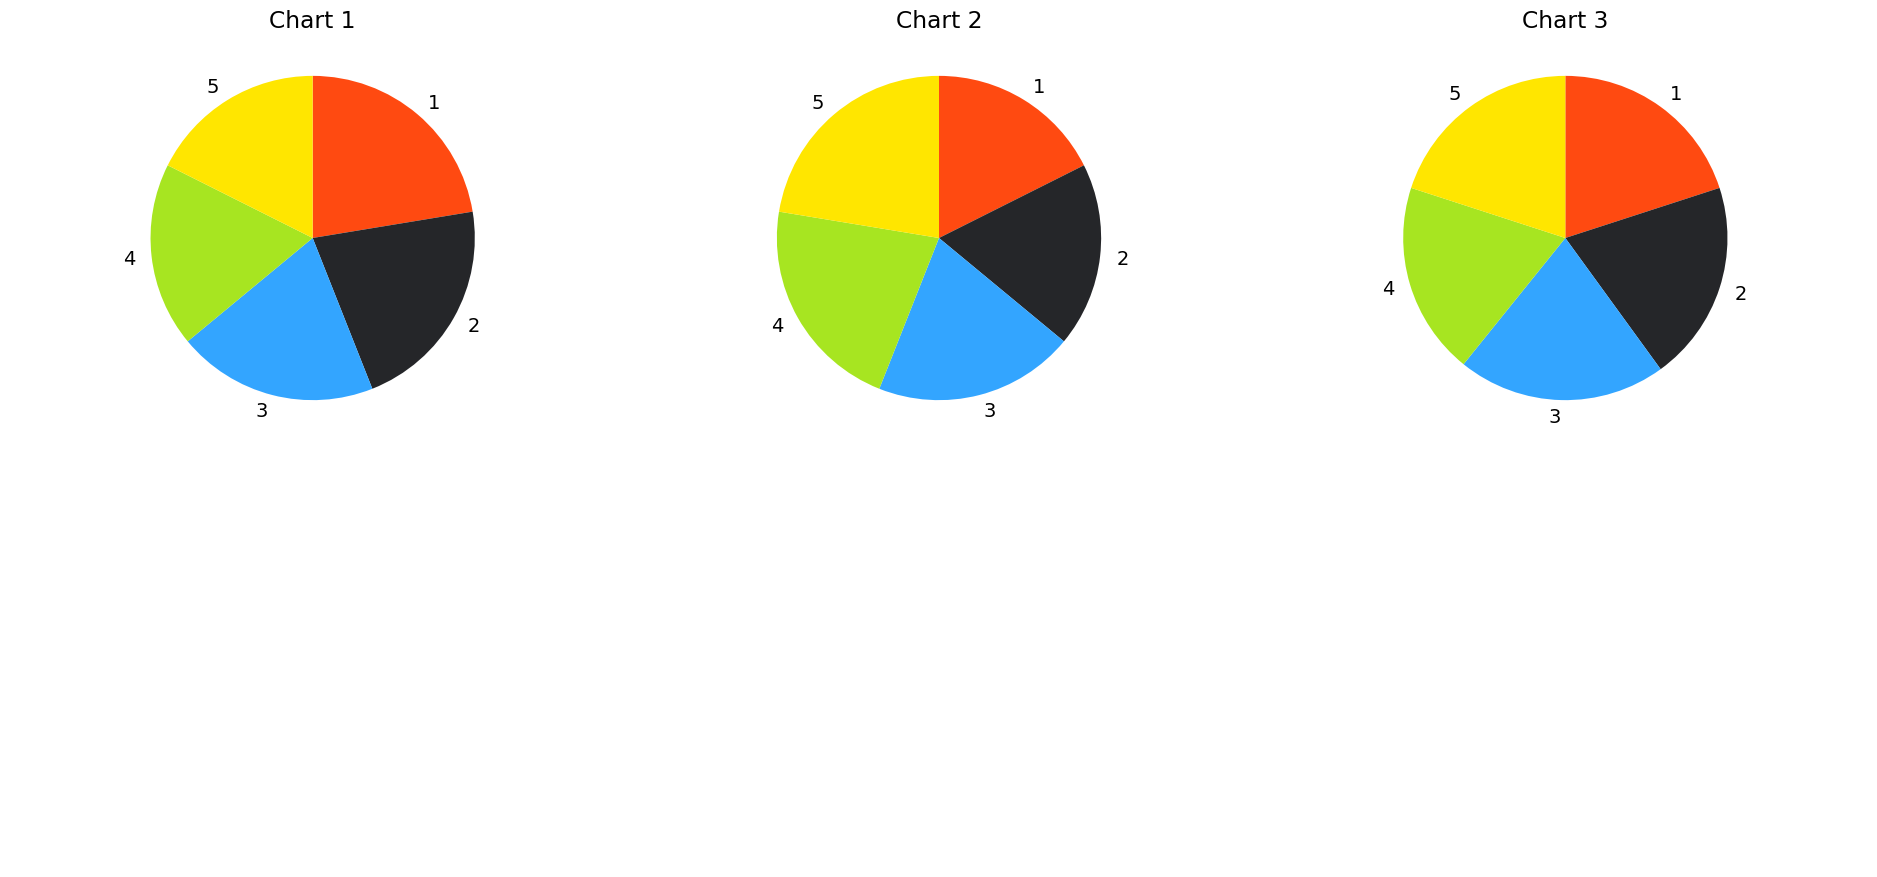

In [6]:
length_vs_area(barplots=False)

Q: which area is the largest?

#### Lengths vs. Areas

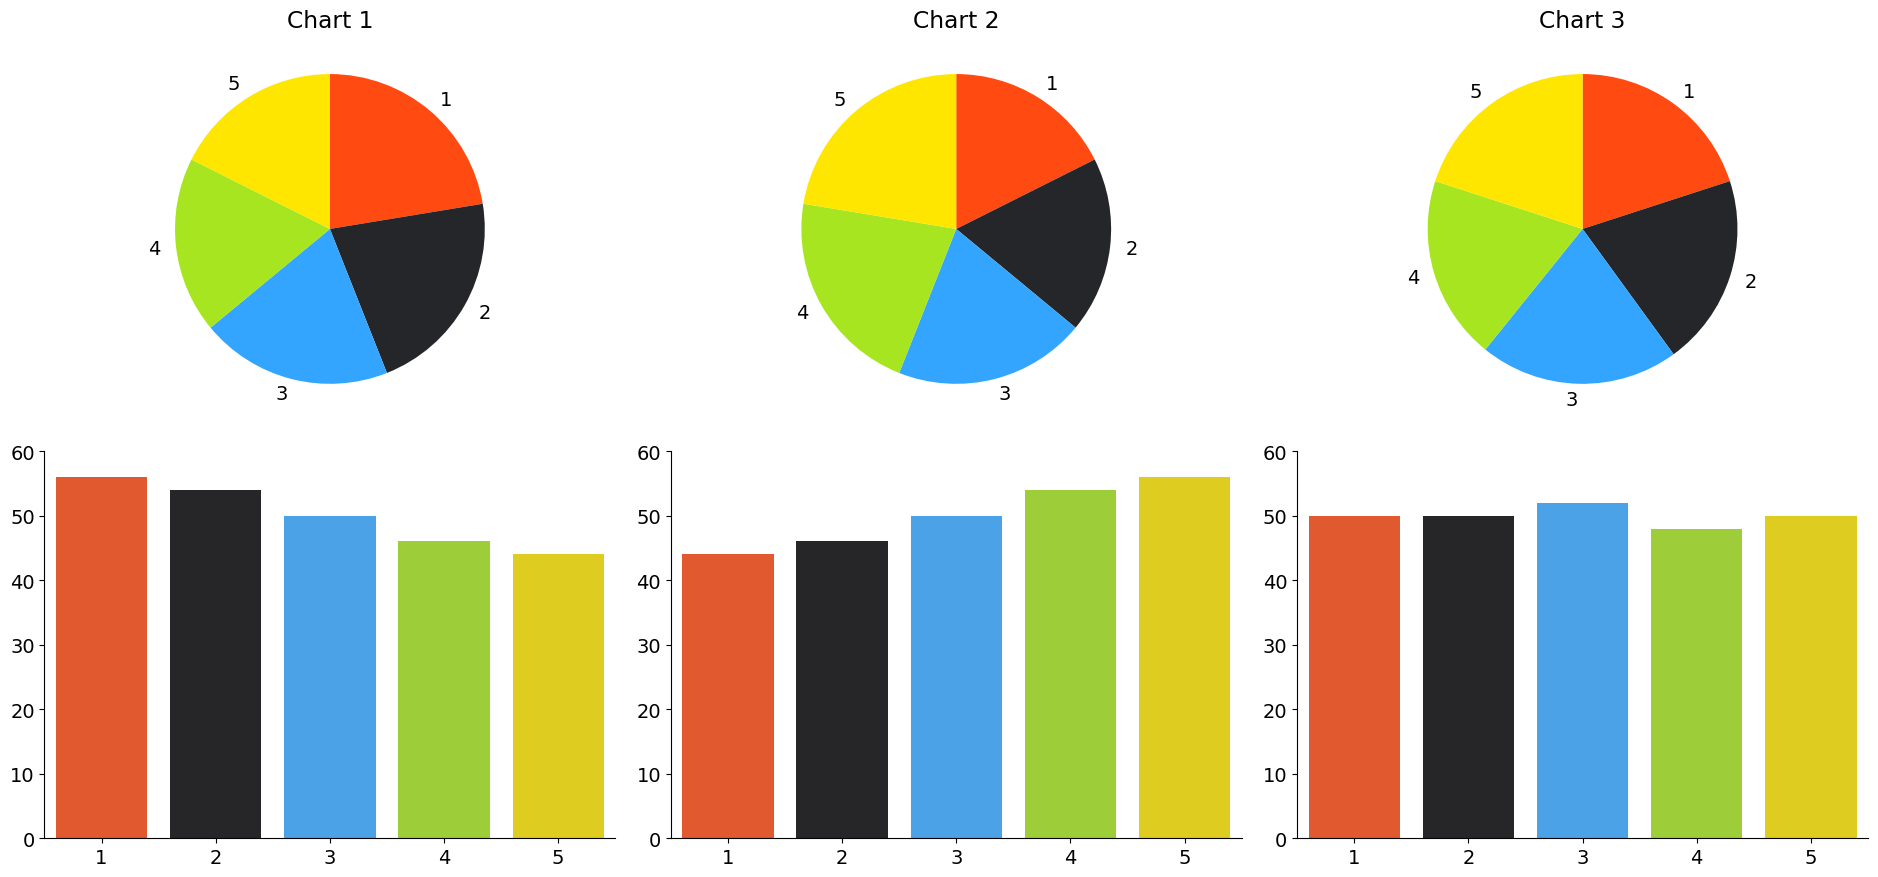

In [7]:
length_vs_area()

Notes: Length vs. Surfaces

#### Lengths vs. Areas

Let’s check in with our 1915 standards

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p17_1.png">
</center>


#### Lengths vs. Volumes

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p18_1.png">
</center>

Notes: Volume is even harder. By how much did the new iPad’s battery increase?

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p19_1.png">
</center>

Notes: Two different ways to mess with "accuracy" when visualizing data. No zero-scaling + non-standardized figures (areas)

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p20_1.png" width=800>
</center>


Notes: Cricinfo at it again. When will people learn that using non-standard figures in place of bars actually hides information? 

Minor points: 1. The scale on the left is useless 2. Not clear what the number in the red circle is. 3. Each batsman is playing a different shot. Again distracts from the graph 

Source: http://www.espncricinfo.com/story/_/id/26927142/how-india-beat-australia

Let’s check in with our 1915 standards
<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p21_2.png">
</center>


Notes: 1915

### Efficiency


<div class="slide-chapter-split">
    <div class="title-chapter"> Efficiency</div>
    <div class="image-container">
        <img src="../images/Intro_to_Viz_Charts_2/efficiency_granite.png">
    </div>
</div>

#### "Data-ink ratio"

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p23_1.png">
</center>


Notes: Data-ink ratio. Source: http://xkcd.com/688/. 

Show the gifs from dark horse analytics: 

1. [Bar chart](https://drive.google.com/file/d/1s51r_m5CUVyoozPDxveV6jGWiJvXOJqS/edit)
2. [Table](https://drive.google.com/file/d/1yviRXL3J_eW6wHdiJQKYw3uJlKwfWLtJ/edit)
3. [Pie chart](https://drive.google.com/file/d/1hjXc3RyEbaB9IeWt253vGC1yFc9kyr6N/edit) ...more a joke ;)

### Accessibility


<div class="slide-chapter-split">
    <div class="title-chapter"> Accessibility</div>
    <div class="image-container">
        <img src="../images/Intro_to_Viz_Charts_2/accessibility_granite.png">
    </div>
</div>

#### Colors

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p25_1.png" width=1000>
</center>

Notes: Why could this be a bad example of accessibility? 

#### Colors

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p26_1.png" width=1000>
</center>

[WCAG palettes](https://venngage.com/tools/accessible-color-palette-generator)

Notes: The Web Content Accessibility Guidelines (WCAG). They are a set of recommendations to make Web content more accessible, mainly for people with visual/color disabilities — but also for other cases, including highly limited hardware, such as mobile phones, old monitors, etc. 

Democracy aspect. 

Links: https://venngage.com/tools/accessible-color-palette-generator http://colorsafe.co/

#### Patterns 

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p27_1.png" width=1000>
</center>

Notes: What you could also do is... (click)

#### Patterns

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p28_1.png" width=1000>
</center>

Notes: Patterns also help

#### HSV Color Space

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p29_1.png" width=1000>
</center>


Notes: Talking about color, it might be useful to know about color spaces, e.g. HSV color space (a bit more intuitive than RBG color space). 

- Value: how light or dark? 
- Saturation: how strong or weak?
- Hue: which color? 

#### Color Schemes

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p30_1.png">
</center>

Notes: Some theory on ways to pick color palettes depending on use case and intention. 

#### Color Palettes

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p31_1.png" width=1000>
</center>

Notes: Default color palettes aren’t always AMAZEING. Make your own.

#### Accessibility Guidelines

1. Ensure sufficient **contrast and separation** between elements in the visualization.
2. Do not rely on **color** alone to convey information, and ensure colors used can be distinguished between by people with various forms of color blindness.
3. Provide a text **summary** of the visualization, making sure to **describe** trends or patterns in the visualization.
4. Ensure text is **readable**.
5. Prefer simple and **understandable** language.
6. Prefer simple, **familiar** visualizations over complex novelties.
7. If using animations or movement in the visualization that can be distracting, allow the user to turn this **off**, and respect the “prefers-reduced-motion” CSS media feature when relevant.
8. Make the data **available** in an accessible table format.
9. Make interactive visualizations **keyboard-accessible**.
10. Ensure the visualization is **responsive** to different **screen** sizes and **zoom** levels.



Notes: Guidelines for Accessibility.  

First six are very applicable for daily viz work - lots of folks in the org might need them. 

Last 3 are specifically for screen readers used by blind people and are important for viz in web/product

### What makes a good data visualisation?

<img src="../images/Intro_to_Viz_Charts_2/message_nemo.png" width="75" style="display: inline-block; vertical-align: middle; margin-right: 10px;" alt="Description of the image">
<p style="display: inline; font-size: 32px; font-weight: bold;">Message</p>

<img src="../images/Intro_to_Viz_Charts_2/accuracy_nemo.png" width="75" style="display: inline-block; vertical-align: middle; margin-right: 10px;" alt="Description of the image">
<p style="display: inline; font-size: 32px; font-weight: bold;">Accuracy</p>

<img src="../images/Intro_to_Viz_Charts_2/efficiency_nemo.png" width="75" style="display: inline-block; vertical-align: middle; margin-right: 10px;" alt="Description of the image">
<p style="display: inline; font-size: 32px; font-weight: bold;">Efficieny</p>

<img src="../images/Intro_to_Viz_Charts_2/accessibility_nemo.png" width="75" style="display: inline-block; vertical-align: middle; margin-right: 10px;" alt="Description of the image">
<p style="display: inline; font-size: 32px; font-weight: bold;">Accessibility</p>

* Message
* Accuracy
* Efficiency
* Accessibility

## Break
<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p34_1.png" width=1000>
</center>

## Fantastic Charts and How to Make Them


## Fantastic Charts
   ##### and
## How to Make Them


<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p36_1.png">
</center>


Notes: Which charts? These charts. These are the some of the charts from “Storytelling with Data”, and they’re a good set to use for communication. We will talk about each one of them in more detail by looking at many good and bad examples. More like a photo album that we talk about. Let's see if it works. 

See also: “A tour through the visualisation zoo” for all the charts. http://dl.acm.org/ft_gateway.cfm?id=1805128&ftid=398285&dwn=1

<center>
    <img src="../images/Intro_to_Viz_Charts_2/basic_plots.png">
</center>

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p37_1.png">
</center>


Notes: Not included are box plots (click) and these “radar” charts

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p38_1.png" width=1000>
</center>

Notes: Not included are box plots (click) and these “radar” charts

### Simple Text 

e.g. 91%

If you’ve only got one or two numbers a chart might be a waste of time.

### Tables

For visual presentation of numbers... just **don't**!



But people like tables.

A table works best...
* when it is used to look up **individual values**
* the values must be expressed **precisely**

Notes: Honestly, I don’t think anyone has said this, ever (click). 

But if you feel you have to include a table (perhaps people want to look up their own number precisely) put it in an appendix. And never, ever show it in a presentation except in response to a question. So those are two textual ways of showing data - they both rely on people reading and processing the numbers. When is this a good idea (click)?

[Designing Effective Tables and Graphs by Stephen Few](https://www.perceptualedge.com/images/Effective_Chart_Design.pdf)

A graph works best when...

* the message is contained in the **shape of the data** (patterns, trends, exceptions to the norm)
* **entire sets** of values must be compared

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p45_2.png">
</center>

Notes: If you are up for more about tables and how to use them: [what is a table? SEPTEMBER 24, 2020 BY ALEX VELEZ](http://www.storytellingwithdata.com/blog/2020/9/24/what-is-a-table)

### Heat map


Notes: A lot like a table but more confusing. Prefer for exploration and not explanation. Once you find the pattern you can find a better visual.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p48_1.png" width=1000>
</center>   

Notes: Heat maps are useful for visualizing variance across multiple variables to display patterns in correlations or hot spots. Especially if it’s easy to see the patterns! Because it’s a bit of a puzzle for us to read. Right side is clearer than left side. https://theblog.okcupid.com/undressed-whats-the-deal-with-the-age-gap-in-relationships-3143a2ca5178?gi=a9e2bc330ee3

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p49_1.png">
</center>   



Notes: Also good for visualizing hot spots. Better with less colours (and saturation instead), but maybe put the days on x? https://www.highcharts.com/demo/heatmap

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p49_2.png">
</center> 

### Scatterplot

Notes: So when do we use it (click)? 

Maps data to 2D position.

Notes: When we want to show a relationship between two things. Anything else?

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p53_1.png">
</center> 

Notes: You can layer things on with surprising effect. So here this is a standard scatter plot of weekly earnings, and they’re using colour to denote occupation. Then, they add some lines to give context - that’s just x=y on there in bold. But suddenly it’s really easy to see how far off things are… These are probably under-used, I think - just the dots isn’t a lot of good, but they have a lot of explanatory power if used correctly. http://www.nytimes.com/interactive/2009/03/01/business/20090301_WageGap.html

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p54_1.png" width=1000>
</center> 



Notes: This one is by Jane Pong. Notice the use of small multiples to facilitate understanding: https://www.ft.com/jane-pong https://en.wikipedia.org/wiki/Small_multiple

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p55_1.png" width=1000>
</center> 



Notes: Then there’s these (connected scatterplots) again. http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p56_1.png">
</center> 

Notes: See also http://fivethirtyeight.com/datalab/the-death-spiral-of-m-night-shyamalans-career/ for the best footnotes. Best. Footnotes.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p57_1.png">
</center> 

Notes: If you have a lot of points in a scatterplot, you have problems. At least one of the problems you have is overplotting. http://flowingdata.com/2015/08/11/real-chart-rules-to-follow/

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p58_1.png">
</center> 

Notes: if you have that problem, you can do a few things: 
1. adjust opacity of each point so that you can see through them, 
2. bin points and plot counts (histograms), 
3. or just plot it as a density contour anyway.

### Line Chart

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p60_1.png" width=1000>
</center> 

Notes: A single series of data

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p61_1.png" width=1000>
</center> 


Notes: Multiple series of data, consistent intervals on the x axis You can add a line for the average Here Q4 is named complete for some reason

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p62_1.png">
</center> 

Notes: http://www.nytimes.com/interactive/2009/11/06/business/economy/unemployment-lines.html Worth noting, you can have a lot of series on a line chart - take this, for example. How many series are visible? 6x3x4x4=240. At once.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p63_1.png" width=500>
</center> 



Notes: Having multiple lines in one plot can be fine, if e.g. one stands out and the others are just for context. Color coding certain subgroups also helps to visualize general trends/patterns. 

http://www.nytimes.com/interactive/2016/04/16/upshot/stephen-curry-golden-state-warriors-3-pointers.html?_r=0

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p64_1.png">
</center> 

Notes: Similar to connected dot plot example from before, but, one variable (miles driven per capita) less. Line plot by definition can only have a unique definition area (same x axis value cannot have more than one y value). Still, enough information in a graph depending on your message. 

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p65_1.png">
</center> 

Notes: You can also draw lines as areas (area chart). This is usually a bad idea, and probably only makes sense if what you’re showing is a cumulative value of one series. In that case, it emphasises ‘weight’ visually. See also: http://blog.visual.ly/line-vs-area-charts/ http://www.fourstepsresearch.com/data-visualization/area-graphs-good/

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p66_1.png">
</center> 

Notes: If you’ve got more than one series though, if you stack the areas (because you want to show the total and all the separate ones at the same time), you get something like this: http://www.everydayanalytics.ca/2014/08/stacked-area-graphs-are-not-your-friend.html

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p67_1.png">
</center> 

Notes: What’s the difference between the data in these two charts?

<div class="group">
  <div class="images">
    <img src="../images/Intro_to_Viz_Charts_2/img_p68_1.png" >
  </div>
  <div class="images">
    <img src="../images/Intro_to_Viz_Charts_2/img_p68_2.png" >
  </div>
</div>

Notes: A better way to show them is as total and separate values in facets. Especially if there is no shared/simple trend between the separate lines. 

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p69_1.png" width=500>
</center> 

Notes: Another good example of plotting multiple line plots into the same graph. 

### One more type...



Notes: One more subtype of line charts. 

<div class="group">
  <div class="images">   
<img src="../images/Intro_to_Viz_Charts_2/img_p71_1.png">
    </div>
    <div class="images">
    </div>
</div>


Notes: So what are these? Well, they’re called sparklines - word-sized line charts without explicit axes that you can use inline with text. They don’t have to be line charts, but they usually are. Pretty easy in plotly - hide the axes, set limits accordingly.

<div class="group">
  <div class="images">   
      <img src="../images/Intro_to_Viz_Charts_2/img_p71_1.png">
  </div>
  <div class="images">
      <img src="../images/Intro_to_Viz_Charts_2/img_p72_1.png">
  </div>
</div>




Notes: You can fit sparklines into your analysis as part of a paragraph - that makes them great for giving context around numbers without taking up space. I’ve not come across this at work often, but I’d love to see more of it.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p73_1.png">
</center>

Notes: When drawing line graphs of any type, you should be careful about your aspect ratio. Is it misleading? Would people draw the same conclusions if you changed it? How does it fit with a longer time period? (don’t just let the software choose)

From the eager eyes article, see also https://eagereyes.org/basics/banking-45-degrees 

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p74_1.png" width=1000>
</center>

 

Notes: Related to aspect ratios and lastly, let’s talk about two axes with different scales. Here’s an example: the left axis is revenue in USD, the right axis is units sold. What do you notice on this graph? The crossing point. What’s the meaning of that point? via the excellent discussion at: http://www.perceptualedge.com/articles/visual_business_intelligence/dual-scaled_axes.pdf

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p75_1.png" width=1000>
</center>



Notes: How about this? What’s different? Where’s the crossing point? If you really want to compare these two series, what could you do?

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p76_1.png" width=1000>
</center>



Notes: You could scale them both to be percentages. So now we’re looking at growth in % for revenue and units sold. I’d argue that this is a much more revealing chart.

## Break
<center> 
    <img src="../images/Intro_to_Viz_Charts_2/img_p77_1.png" width=600>
</center>


### Slopegraph

Two points of comparison

Notes: So these are a chart type you can use when you have exactly two points of comparison - they don’t work with more than two (in fact, they become parallel coordinates, which is a whole separate discussion). Your two points could be time points or they could be experiment categories or, well, anything categorical I guess.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p80_1.png">
</center>



Notes: So let’s take a look at this - we’ve got two vertical axes, measuring the same thing, which are aligned. What are our two points for comparison? What can we tell from this graph? Two things - the value of every line (if we want to look) and the rate of change between the two points. If you have too many data points it’s just a mess, but it can be pretty powerful. What other mappings are going on in this chart? from: http://www.visualisingdata.com/2013/12/in-praise-of-slopegraphs/

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p81_1.png" width=600>
</center>


Notes: Here’s one more example, via http://charliepark.org/slopegraphs/ The two axes here are health care spending per person and average life expectancy at birth. What do you think? Are there any issues with this?

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p82_1.png">
</center>

Notes: Here’s the same data as a scatterplot (by the same designer, actually - in response to online critique…) What do you think? Better or worse? Is it more ‘truthful’?

### Bar Chart

Your go-to chart for → **categorical data**


<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p85_1.png" width=1000>
</center>




Notes: What happened here? ;) (zero-line)

https://flowingdata.com/2014/04/04/fox-news-bar-chart-gets-it-wrong/

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p86_1.png" width=1000>
</center>


Notes: Another one (same problem as before)

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p87_1.png" width=1000>
</center>



Notes: And another one... (same problem as before)

http://flowingdata.com/2012/08/06/fox-news-continues-charting-excellence/ What’s wrong with these? How do we read bar charts?

<div class="grouped">
  <div class="images">
    <img src="../images/Intro_to_Viz_Charts_2/img_p88_1.png" width=400>
  </div>
  <div class="images">
    <img src="../images/Intro_to_Viz_Charts_2/img_p88_2.png">
  </div>
</div>


Notes: Here’s the same data from the last fox news picture and how it should be done. Again, remember 1915. 

### Bar charts must have a zero baseline

Notes: When we look at bar charts, we’re comparing length of two aligned bars. For that to be a valid comparison, they have to have a 0 baseline. Is this true for line graphs?

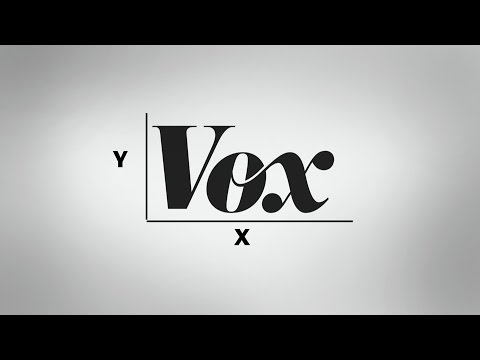

In [8]:
from IPython.display import YouTubeVideo
YouTubeVideo("14VYnFhBKcY", width=400)

Notes: They make a lot of good points in this. But if you have a bar graph, you need to make sure it’s showing the right lengths.

### But all my values are really close together!

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p92_1.png">
</center>


Notes: How could we solve this? E.g. guidelines, color, difference in y, line plot, etc. 

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p93_1.png" width=1000>
</center>


Notes: here’s another bar chart (cat vs. cat)

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p94_1.png" width=1000>
</center>

Notes: We could do this. What the advantage of this one? Data-ink ratio? How do I add a series? Multiple series as dots, and no requirement for zero scaling. http://www.infragistics.com/community/blogs/tim_brock/archive/2015/05/11/bar-charts-versus-dot-plots.aspx

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p92_1.png">
</center>

Notes: Just to pull it back - one nice tip here, if you feel you really need grid lines then do it in white: it actually facilitates comparison while maintaining data-ink ratio.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/negative_graffiti.png">
</center>

Notes: It kinda reminds me of reverse graffiti: you clean the pavement in the shape of your ad.

https://en.wikipedia.org/wiki/Reverse_graffiti

### Vertical vs Horizontal Bar Chart

Notes: But anyway, back on topic: I see a lot of bar charts that look like this.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p98_1.png" width=800>
</center>


Notes: Sorry for the resolution on this one. I couldn’t bring myself to redraw it… What’s bad about this chart (not ordered)? 

If you’ve got categories in no particular order, then maybe put them horizontally. If they’re ordered (think histogram or time), consider putting them vertically. I’ve pretty much never seen vertical charts at work, and that’s something I would like to change. They’re easier to read - we naturally read left to right, top to bottom (most people nowadays, but Arabic, ancient Chinese/Asian), so in a horizontal chart we’ll read the category name before we see the value. That’s the order we want. Pick what makes your data easiest to understand.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p99_1.png">
</center>

Notes: When I see this chart, I end up just thinking ‘ow, my neck hurts’.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p100_1.png" width=500>
</center>

Notes: This is better already. Still too many categories though.

### Grouped Bar Charts



Notes: So you might also have series within categories. You can plot groups of bars. If you’re unlucky, it comes out like this.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p102_1.png">
</center>    


<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p103_1.png" width=600>
</center>


Notes: A dual series bar chart where the differences are important would be better represented as a connected dot plot. 

Source: http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p104_1.png" width=1000>
</center>    


Notes: Common in economist newspaper.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p105_1.png" width=1000>
</center>

Notes: It can also allow you to show change over time

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p106_1.png" width=1000>
</center>    


Notes: But it’s more commonly used for survey data

### Stacked Bars


Rarely a good idea.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p109_1.png">
</center>  

Notes: Works well when we’re just got two subcomponents

via https://www.perceptualedge.com/blog/?p=2239

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p110_1.png">
</center>      


Notes: Works less well. Easy to compare top and bottom sections, the middle is pretty useless. This is a general case with stacked charts - it’s easy to compare top and bottom and that’s it. What to use instead? (Please, nobody say pie charts)

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p111_1.png">
</center>      


<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p112_1.png">
</center>      


Notes: 1. Why would you stack bars with quantities that have different units? 2. In the light of 1, this is minor but, why would you choose near-identical colours two quantities you’re stacking? Whose what goes in picking contrasting colours?

### Do vertical bars always go up?


Notes: Just one quick tangent here - bar charts can go both ways.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p114_1.png">
</center>      



Notes: Has anyone seen this before? Big news in the viz community in 2010. It’s a great chart, and only slightly misleading in its graphical presentation. But for communication, wow. Can anyone see what it does ‘wrong’? I’ll give you a hint… via https://eagereyes.org/blog/2012/bikini-chart

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p115_1.png">
</center>      


Notes: Can you see it?

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p116_1.png">
</center>      
    

Notes: Do you see it? Heavier colours at the bottom make the difference more apparent. Pretty subtle… it might just be a design decision, but it has an impact.

## Break

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p117_1.png" width=600>
</center>      



Notes: Some more exotics after the break ;)

### What about geographical data?

Notes: Just one quick tangent here - bar charts can go both ways.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p119_1.png">
</center>      
    
    
[infoactive.co](https://infoactive.co/data-design/ch18.html)


<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p120_1.png">
</center>      


Notes: Also works better as a bar chart

### Waterfall

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p122_1.png" width=1000>
</center>      



Notes: Often used in HR/People departments and in financial industry to show credit, debits, gains and losses. Comparing lengths floating in space is harder than comparing to the baseline, like the standard bar chart. Some bars need to be read going up and some down. And when there are large quantities and small differences there’S a temptation to cut the y-axis which would cost us accuracy. It’s somewhat uncommon and if it’s not a part of your domain you will likely never make one. only in specific domains due to these limitations.

### Square Area Charts (Waffle or Unit Charts)



<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p124_1.png">
</center>      



Notes: Seen these before? One dot or square or icon indicates a certain number of some other thing. That may be the vaguest sentence I’ve spoken today. http://helpmeviz.com/2015/09/01/waffle-charts/

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p125_1.png" width=600>
</center>      


Notes: This is in the same general class. 

Nice to illustrate absolute quantities and folds of data with wide dynamic range. 

https://xkcd.com/radiation/

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p126_1.png" width=400>
</center>      



<a href="https://www.youtube.com/watch?v=kImBBI6L8MI&t=7s"> Great when presenting live! </a>

### That’s all the charts




Notes: Now you have a few more ideas for how to make fantastic chats!

## Summary
   - Why we make data visualisation.
   - What makes a good Data visualisation.
   - How to make all your charts fantastic.



Notes: exploration & communication message, accuracy, efficiency, accessibility Name a few insights/pitfalls you saw today.

<center>
    <img src="../images/Intro_to_Viz_Charts_2/img_p130_1.png">
</center>      


Notes: There’re a lot of good books on data visualization. If there’s something here you’d like to read (the ones I’ve shown here are definitely worth the effort).

## Exercises


### Optional Exercises
- Read [this blog post](https://www.learnui.design/blog/the-hsb-color-system-practicioners-primer.html) and use tools like [Data Color Picker](https://www.learnui.design/tools/data-color-picker.html#palette) and [Coolors](https://coolors.co/palettes/trending) to build and store color palettes for different use cases (a lot of categories, gradients, divergence)
- Build a 10 colour colour palette that fits your brand, and follows good colour differentiation principles from the Fundamentals chapter.
- Take a look at a slide you made with several charts. List all the Gestalt principles you can spot. Make note of which one is stronger. Consider giving it a makeover based on your findings.


### Optional Exercises: Data Viz Review
- Form a pair or a small group
- Once a month, send your most important plot (.e.g the one regarding the most important business finding/decision, the one shown to most stakeholders) to your reviewer for feedback. If you form a group, it can be nice to meet and listen to the everyone’s reviews
-  Each time, give feedback around a different theme:
    - Fundamentals: message, accuracy, efficiency
    - Gestalt Principles: proximity, similarity, enclosure, closure, continuity, connection
    - Chart Types: offer improvements, or alternatives
    - Storytelling Process: context, choosing a visual, remove clutter, focus audience attention, tell stories


